In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [2]:
# Loading the dataset
df = pd.read_csv("weekly_customer_complaints.csv", index_col="week", parse_dates=True)
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [3]:
# Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-01-01 to 2022-12-26
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaints               261 non-null    object
 1   discount_rate            261 non-null    object
 2   small_commercial_event   261 non-null    int64 
 3   medium_commercial_event  261 non-null    int64 
 4   big_commercial_event     261 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.2+ KB


# Data Preprocessing

In [4]:
# Remove comma and convert to float
df['complaints'] = df['complaints'].str.replace(',', '').astype(float)
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750.0,37.26%,1,0,0
2018-01-08,1701.0,35.38%,0,0,0
2018-01-15,1711.0,36.22%,1,0,0
2018-01-22,1443.0,38.33%,1,0,0
2018-01-29,1397.0,36.34%,0,0,0


In [5]:
# Setting the frequency as W implies that the Week starts on sunday
df = df.asfreq('W-Mon')
df.index 


DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq='W-MON')

# Exploratory Data Analysis

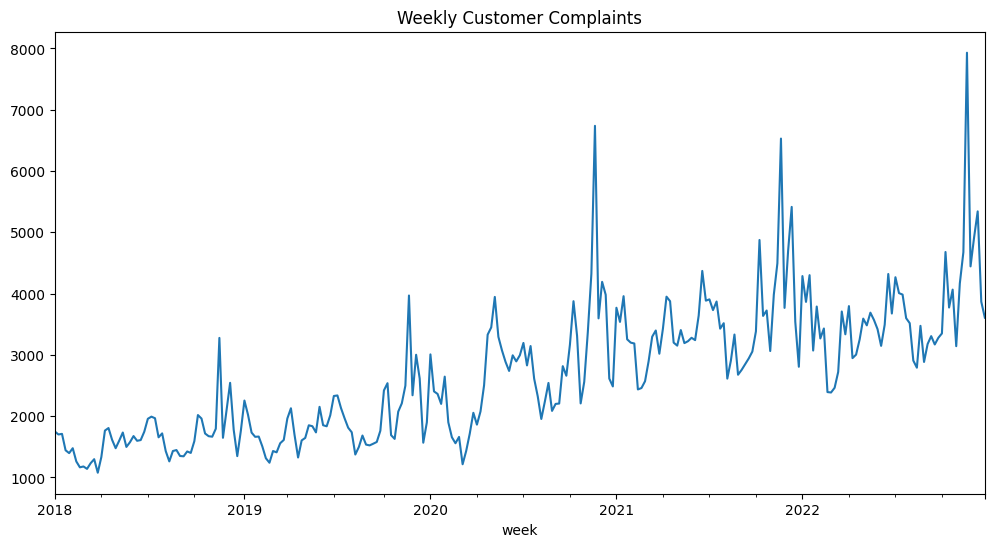

In [6]:
# Daily closing price plot
df['complaints'].plot(title='Weekly Customer Complaints', figsize=(12, 6))
plt.show()

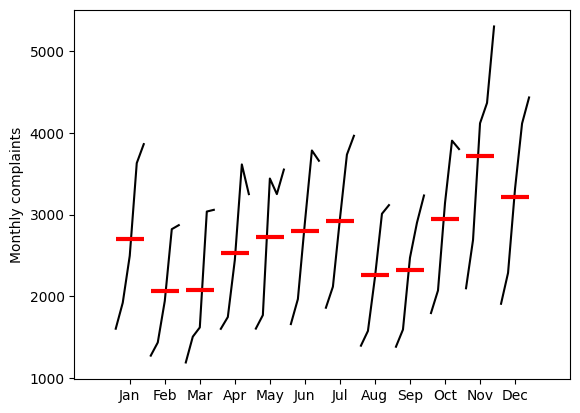

In [7]:
# Plotting monthly seasonality
month_plot(df['complaints'].resample('ME').mean(), ylabel='Monthly complaints')
plt.show()

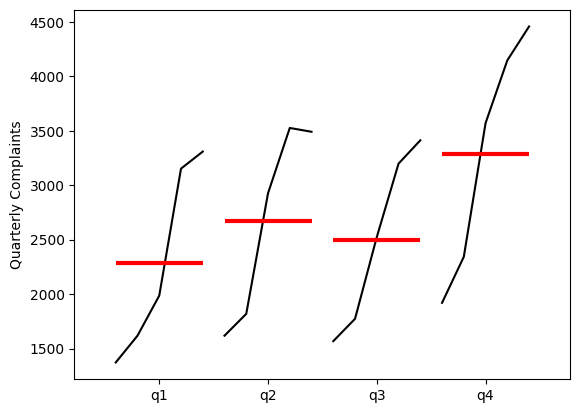

In [8]:
# Plotting quaterly seasonality
quarter_plot(df['complaints'].resample('QE').mean(), ylabel='Quarterly Complaints')
plt.show()

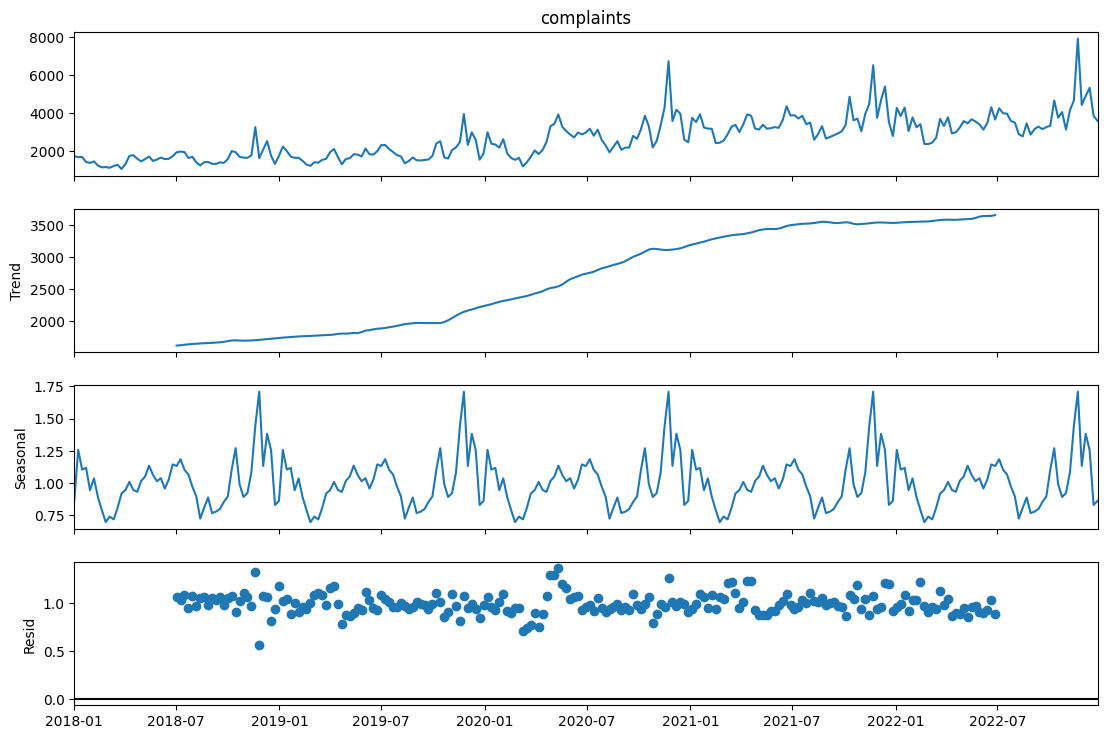

In [9]:
# Decomposing the time series (Bitcoin Closing Price)
result = seasonal_decompose(df['complaints'], model='multiplicative', period=52)
fig = result.plot()
fig.set_size_inches(12, 8)
plt.show()


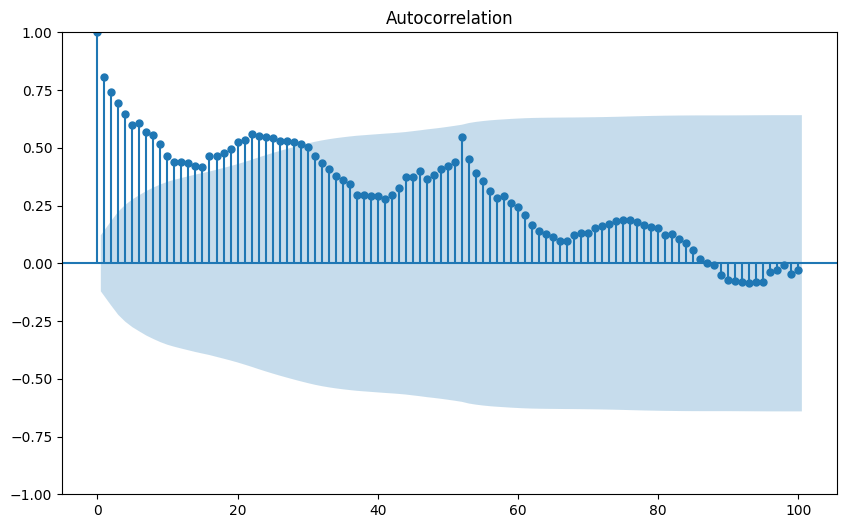

In [10]:
# Plot the ACF of the Bitcoin Closing Price
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(df['complaints'].dropna(), lags=100, ax=ax)
plt.show()

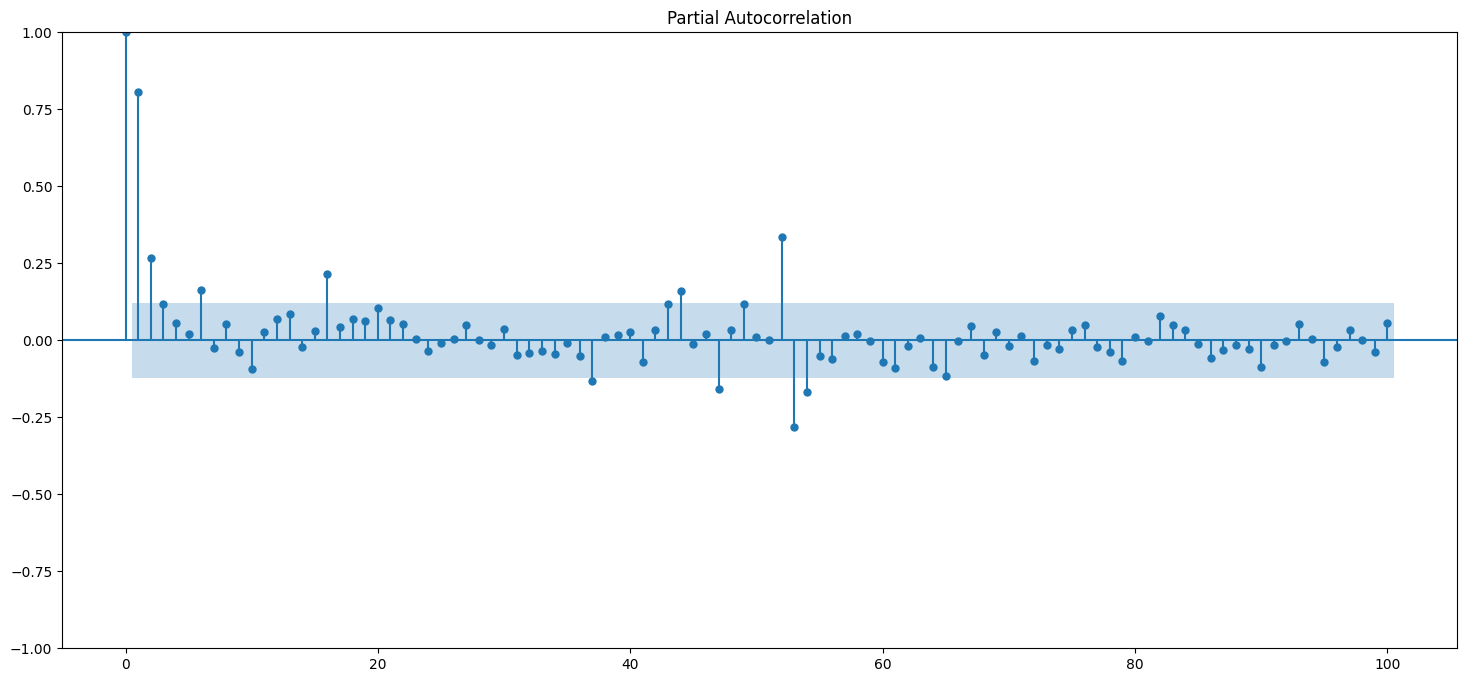

In [11]:
# Plot the PACF of the Bitcoin Closing Price
fig, ax = plt.subplots(figsize=(18, 8))
plot_pacf(df['complaints'].dropna(), lags=100, ax=ax)
plt.show()

# Training and Testing
Goal: to predict the next quarter (13 weeks)

In [12]:
# Train-test split
periods = 13
train, test = df.iloc[:-periods,0], df.iloc[-periods:,0]

test

week
2022-10-03    3350.0
2022-10-10    4679.0
2022-10-17    3773.0
2022-10-24    4065.0
2022-10-31    3142.0
2022-11-07    4164.0
2022-11-14    4677.0
2022-11-21    7931.0
2022-11-28    4444.0
2022-12-05    4920.0
2022-12-12    5342.0
2022-12-19    3868.0
2022-12-26    3607.0
Freq: W-MON, Name: complaints, dtype: float64

# Exponential Smoothing

In [13]:
# Simple Exponential Smoothing Model and Prediction
model_simple = SimpleExpSmoothing(train).fit()
predictions_simple = model_simple.forecast(len(test))


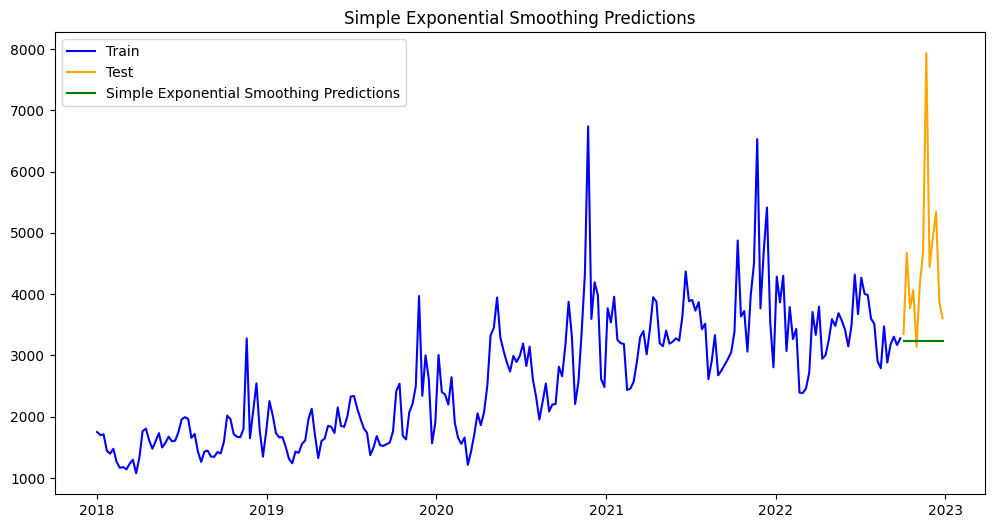

In [14]:
# Plot train, test, and predictions
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='orange')
plt.plot(predictions_simple, label='Simple Exponential Smoothing Predictions', color='green')
plt.title('Simple Exponential Smoothing Predictions')
plt.legend()
plt.show()

In [15]:
# Double Exponential Smoothing Model and Prediction
model_double = ExponentialSmoothing(train, trend='add', seasonal = None).fit()
predictions_double = model_double.forecast(len(test))

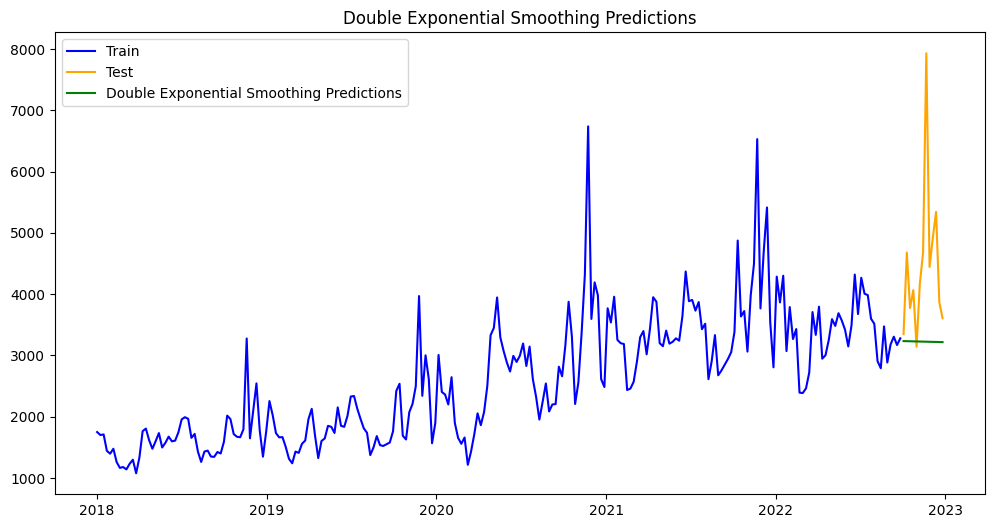

In [16]:
# Plot train, test, and predictions
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='orange')
plt.plot(predictions_double, label='Double Exponential Smoothing Predictions', color='green')
plt.title('Double Exponential Smoothing Predictions')
plt.legend()
plt.show()

In [17]:
# Triple Exponential Smoothing Model and Prediction (holt-winters)
model_triple = ExponentialSmoothing(train, trend='add', seasonal = 'mul', seasonal_periods = 52).fit()
predictions_triple = model_triple.forecast(len(test))
predictions_triple

2022-10-03    4019.396471
2022-10-10    5037.350687
2022-10-17    3908.313543
2022-10-24    3520.445900
2022-10-31    3407.190591
2022-11-07    4222.869513
2022-11-14    5327.526516
2022-11-21    7235.331390
2022-11-28    4302.119722
2022-12-05    5255.275791
2022-12-12    5277.268307
2022-12-19    3428.020525
2022-12-26    3243.888123
Freq: W-MON, dtype: float64

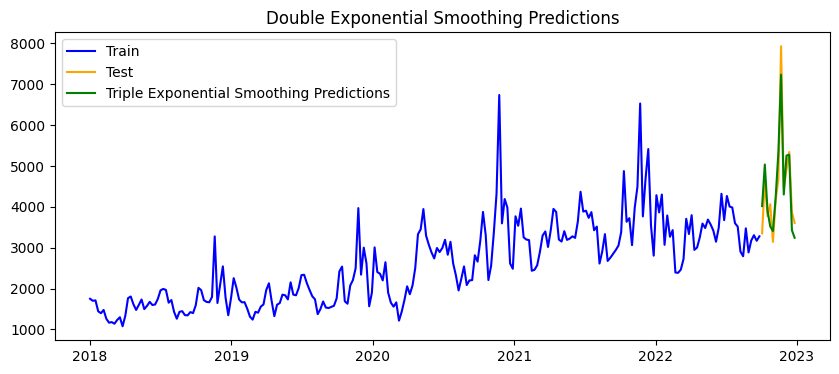

In [18]:
# Plot train, test, and predictions
plt.figure(figsize=(10, 4))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='orange')
plt.plot(predictions_triple, label='Triple Exponential Smoothing Predictions', color='green')
plt.title('Double Exponential Smoothing Predictions')
plt.legend()
plt.show()

In [19]:
# Calculating MAE, RMSE, and MAPE 
mae = mean_absolute_error(test, predictions_triple)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
rmse = mean_squared_error(test, predictions_triple)
rmse = rmse ** 0.5
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
mape = mean_absolute_percentage_error(test, predictions_triple)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')

Mean Absolute Error (MAE): 363.30
Root Mean Squared Error (RMSE): 423.76
Mean Absolute Percentage Error (MAPE): 8.45%


In [20]:
# fucntion to assess model and visualize output
def assess_model(train, test, predictions, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(train, label='Train', color='blue')
    plt.plot(test, label='Test', color='orange')
    plt.plot(predictions, label=f'{model_name} Predictions', color='green')
    plt.title(f'{model_name} Predictions')
    plt.legend()
    plt.show()

    mae = mean_absolute_error(test, predictions)
    print(f'Mean Absolute Error (MAE) for {model_name}: {mae:.2f}')
    rmse = mean_squared_error(test, predictions)  
    rmse = rmse ** 0.5
    print(f'Root Mean Squared Error (RMSE) for {model_name}: {rmse:.2f}')
    mape = mean_absolute_percentage_error(test, predictions)        
    print(f'Mean Absolute Percentage Error (MAPE) for {model_name}: {mape:.2%}')                      

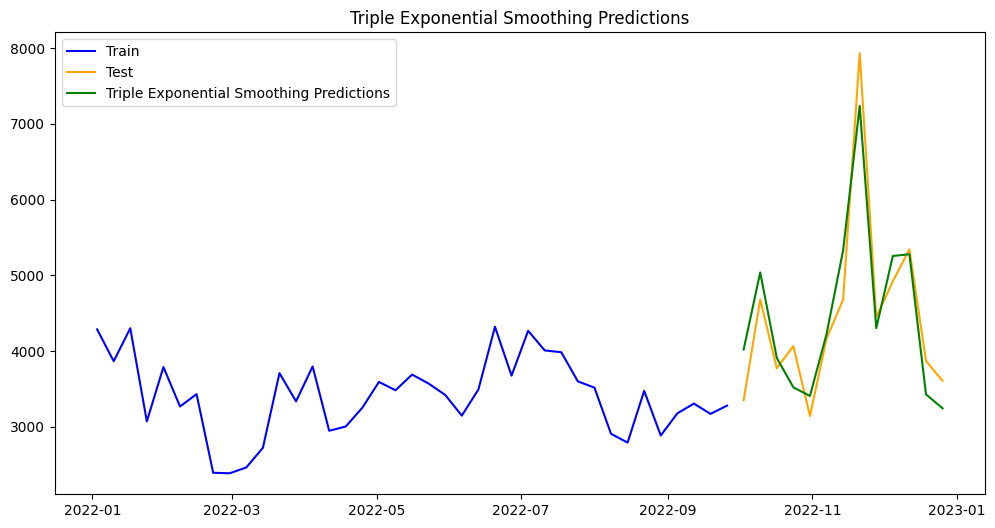

Mean Absolute Error (MAE) for Triple Exponential Smoothing: 363.30
Root Mean Squared Error (RMSE) for Triple Exponential Smoothing: 423.76
Mean Absolute Percentage Error (MAPE) for Triple Exponential Smoothing: 8.45%


In [21]:
assess_model(train['2022':], test, predictions_triple, 'Triple Exponential Smoothing')

# Predicting the future

In [22]:
model_final = ExponentialSmoothing(df.complaints, trend='add', seasonal = 'mul', seasonal_periods = 52).fit()
forecast = model_final.forecast(len(test))
forecast

2023-01-02    4837.393872
2023-01-09    4367.554927
2023-01-16    4577.110340
2023-01-23    3718.420269
2023-01-30    4134.549716
2023-02-06    3627.328782
2023-02-13    3293.123278
2023-02-20    2795.305309
2023-02-27    2886.388812
2023-03-06    2950.441106
2023-03-13    3324.831619
2023-03-20    3806.124334
2023-03-27    3679.920595
Freq: W-MON, dtype: float64

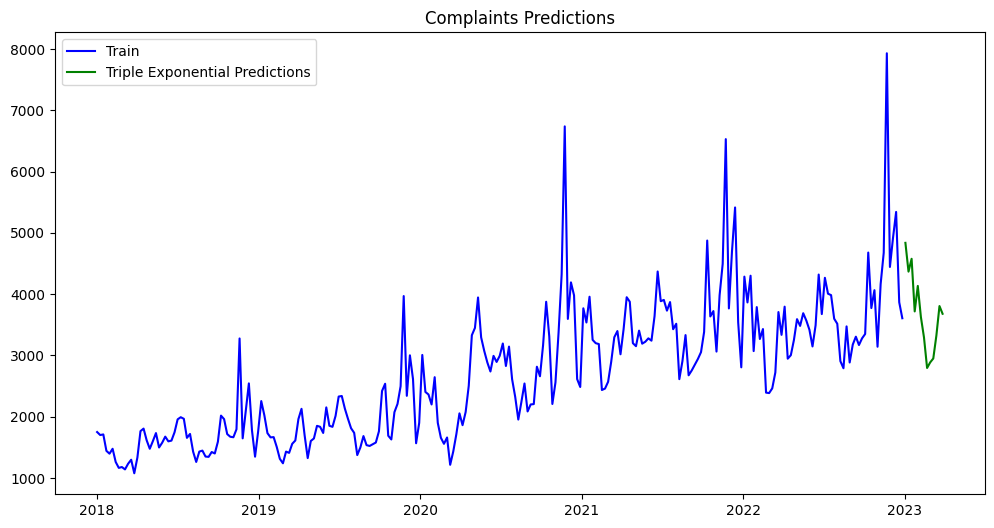

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df.complaints, label='Train', color='blue')
plt.plot(forecast, label=f'Triple Exponential Predictions', color='green')
plt.title(f'Complaints Predictions')
plt.legend()
plt.show()

In [24]:
# function for forecasting and plotting
def forecast_and_plot(dataset, model, periods, title):
    forecast = model.forecast(periods)
    plt.figure(figsize=(12, 6))
    plt.plot(dataset, label='Historical Data', color='blue')
    plt.plot(forecast, label='Forecast', color='green')
    plt.title(title)
    plt.legend()
    plt.show()
    return forecast

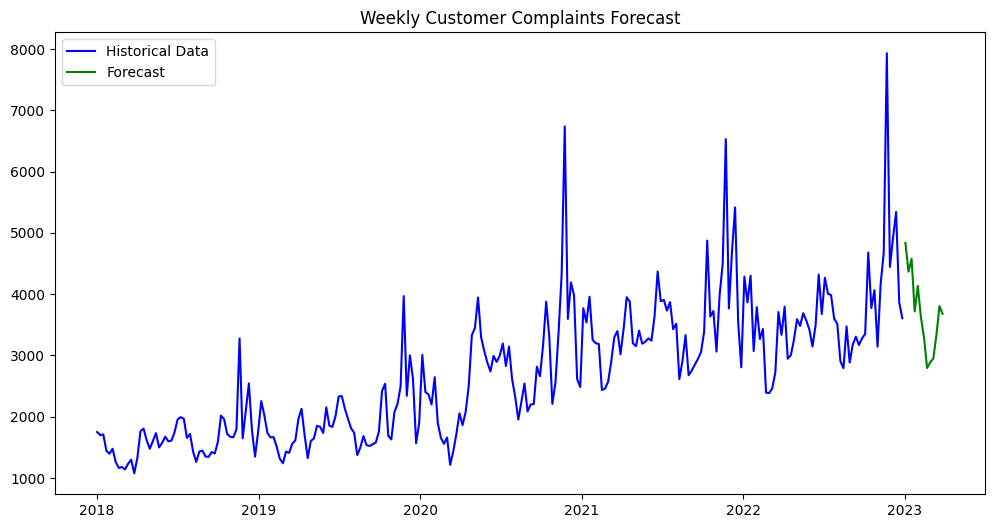

2023-01-02    4837.393872
2023-01-09    4367.554927
2023-01-16    4577.110340
2023-01-23    3718.420269
2023-01-30    4134.549716
2023-02-06    3627.328782
2023-02-13    3293.123278
2023-02-20    2795.305309
2023-02-27    2886.388812
2023-03-06    2950.441106
2023-03-13    3324.831619
2023-03-20    3806.124334
2023-03-27    3679.920595
Freq: W-MON, dtype: float64

In [25]:
forecast_and_plot(df.complaints, model_final, 13, 'Weekly Customer Complaints Forecast')
    

# Daily Data

In [28]:
df_daily = pd.read_csv("bitcoin_price.csv", index_col="Date", parse_dates=True)
df_daily.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [29]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3392 entries, 2014-09-17 to 2023-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3392 non-null   float64
 1   High       3392 non-null   float64
 2   Low        3392 non-null   float64
 3   Close      3392 non-null   float64
 4   Adj Close  3392 non-null   float64
 5   Volume     3392 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 185.5 KB


In [32]:
df_daily = df_daily.asfreq('D')
df_daily.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq='D')

In [37]:
# Train-test split
periods = 30
train, test = df_daily.iloc[:-periods,3], df_daily.iloc[-periods:,3]
test

Date
2023-12-01    38688.750000
2023-12-02    39476.332031
2023-12-03    39978.390625
2023-12-04    41980.097656
2023-12-05    44080.648438
2023-12-06    43746.445312
2023-12-07    43292.664062
2023-12-08    44166.601562
2023-12-09    43725.984375
2023-12-10    43779.699219
2023-12-11    41243.832031
2023-12-12    41450.222656
2023-12-13    42890.742188
2023-12-14    43023.972656
2023-12-15    41929.757812
2023-12-16    42240.117188
2023-12-17    41364.664062
2023-12-18    42623.539062
2023-12-19    42270.527344
2023-12-20    43652.250000
2023-12-21    43869.152344
2023-12-22    43997.902344
2023-12-23    43739.542969
2023-12-24    43016.117188
2023-12-25    43613.140625
2023-12-26    42520.402344
2023-12-27    43442.855469
2023-12-28    42627.855469
2023-12-29    42099.402344
2023-12-30    42156.902344
Freq: D, Name: Close, dtype: float64

In [47]:
# Triple Exponential Smoothing Model and Prediction (holt-winters)
model_triple = ExponentialSmoothing(train, trend='mul', seasonal = 'mul', seasonal_periods = 7).fit()
predictions_triple = model_triple.forecast(len(test))
predictions_triple

c:\Python\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Python\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2023-12-01    37886.530683
2023-12-02    38024.088403
2023-12-03    38266.388531
2023-12-04    38434.147353
2023-12-05    38667.575121
2023-12-06    38814.368323
2023-12-07    38799.673966
2023-12-08    38967.306063
2023-12-09    39108.787842
2023-12-10    39357.999979
2023-12-11    39530.544397
2023-12-12    39770.631074
2023-12-13    39921.611793
2023-12-14    39906.498255
2023-12-15    40078.912332
2023-12-16    40224.430111
2023-12-17    40480.751433
2023-12-18    40658.217963
2023-12-19    40905.153506
2023-12-20    41060.441197
2023-12-21    41044.896521
2023-12-22    41222.228992
2023-12-23    41371.897904
2023-12-24    41635.531211
2023-12-25    41818.060265
2023-12-26    42072.040049
2023-12-27    42231.757577
2023-12-28    42215.769463
2023-12-29    42398.160634
2023-12-30    42552.099097
Freq: D, dtype: float64

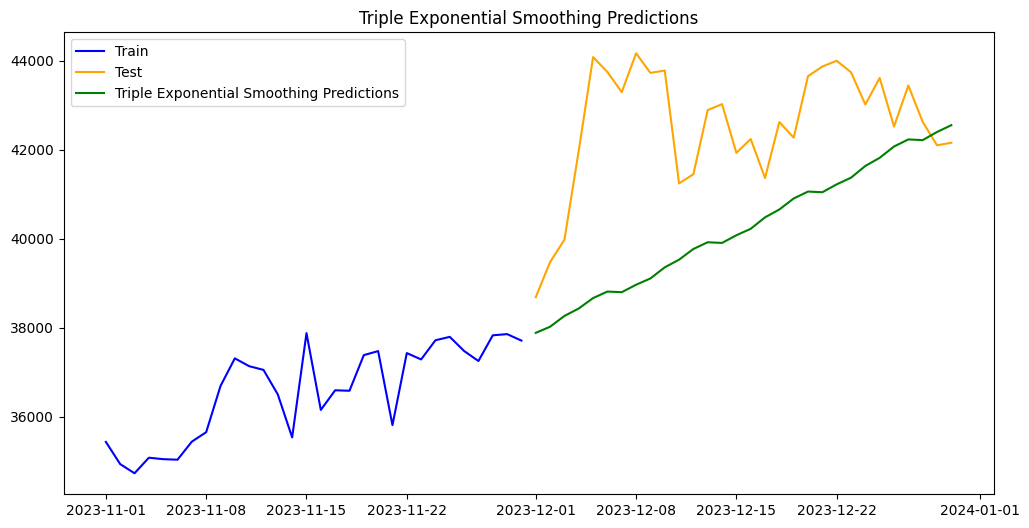

Mean Absolute Error (MAE) for Triple Exponential Smoothing: 2355.00
Root Mean Squared Error (RMSE) for Triple Exponential Smoothing: 2789.72
Mean Absolute Percentage Error (MAPE) for Triple Exponential Smoothing: 5.48%


In [49]:
assess_model(train['2023-11'], test, predictions_triple, 'Triple Exponential Smoothing')